# Car Finance 247 Project

## Data Cleaning

In [321]:
# Importing pandas

import pandas as pd
import numpy as np

In [322]:
# Loading datasets

with_targets = pd.read_csv("Data Files-20250211/Msc_Project_Data_With_Targets.csv")
without_targets = pd.read_csv("Data Files-20250211/Msc_Project_Data_Without_Targets.csv")

In [323]:
# Creating function to clean data

def cleaner(df):
    clean = pd.DataFrame()  # Initialising empty DataFrame

    # Initialising for loop
    for column in df.columns:
        if column != "Call_Type_Name":
            # Cleaning and preparing strings for splitting
            clean_col = (
                df[column]
                .str.replace(r"[{}']", "", regex = True)  # Remove braces and quotation marks
                .str.replace(": ", ":", regex = False)  # Remove space after colon
            )
            
            # Split key-value pairs and expand them into columns
            expanded = clean_col.str.split(",", expand = True)

            # Extract keys and values, and rename columns
            for i in range(expanded.shape[1]):
                key_value = expanded[i].str.split(":", n=1, expand = True)
                if key_value.shape[1] == 2:  # Ensure valid key-value pair
                    key = key_value[0].str.strip()
                    value = key_value[1].str.strip().replace({'False': 0, 'True': 1,
                                                              'Red': 0, 'Amber': 1, 'Green': 2,
                                                              'Poor Outcome': 0, 'Good Outcome with Development': 1, 'Good Outcome': 2,
                                                              'initial_call': 0, 'add_ons_call': 1, 'validation_call': 2, 'uncategorized': 3}) # Encoding Categorical variables
                    
                    # Create columns using key names
                    new_col_name = f"{column}_{key.iloc[0]}"
                    clean[new_col_name] = value

        else:
            # Retain the Call_Type_Name column (target)
            clean[column] = df[column]

    # Return the final DataFrame with all expanded columns
    return clean

# Apply this function to the with targets dataset and show the first few rows
clean_with_targets = cleaner(with_targets)

# Change classes that are not 6 or 7 to other
clean_with_targets['Call_Type_Name'] = clean_with_targets['Call_Type_Name'].apply(lambda x: x if x in ['Category 6', 'Category 7'] else 'Other')

clean_with_targets.head


/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_6332/1572926641.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value = key_value[1].str.strip().replace({'False': 0, 'True': 1,
/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_6332/1572926641.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value = key_value[1].str.strip().replace({'False': 0, 'True': 1,
/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_6332/1572926641.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and w

<bound method NDFrame.head of     Call_Type_Name  Low_Level_Segment6_item1  Low_Level_Segment6_item2  \
0            Other                         0                         0   
1            Other                         0                         0   
2       Category 7                         0                         0   
3       Category 7                         0                         2   
4       Category 7                         0                         0   
..             ...                       ...                       ...   
395     Category 7                         0                         0   
396     Category 7                         0                         0   
397     Category 7                         0                         0   
398     Category 6                         2                         2   
399          Other                         0                         0   

     Low_Level_Segment6_item3  Low_Level_Segment6_item4  \
0                     

In [324]:
# Apply this function to the without targets dataset and show the first few rows
clean_without_targets = cleaner(without_targets)
clean_without_targets.head

/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_6332/1572926641.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value = key_value[1].str.strip().replace({'False': 0, 'True': 1,
/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_6332/1572926641.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value = key_value[1].str.strip().replace({'False': 0, 'True': 1,
/var/folders/32/6zl37k_j123fgy6v2_4hf4_40000gn/T/ipykernel_6332/1572926641.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and w

<bound method NDFrame.head of       Low_Level_Segment6_item1  Low_Level_Segment6_item2  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
2886                         0                         0   
2887                         0                         0   
2888                         0                         0   
2889                         0                         2   
2890                         0                         0   

      Low_Level_Segment6_item3  Low_Level_Segment6_item4  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3        

In [325]:
# Creating new clean csv files

# With Target Dataset
output_file_path_with = "Data Files-20250211/Msc_Project_Data_Clean_With_Targets.csv"
clean_with_targets.to_csv(output_file_path_with, index=False)

# Without Target Dataset
output_file_path_without = "Data Files-20250211/Msc_Project_Data_Clean_Without_Targets.csv"
clean_without_targets.to_csv(output_file_path_without, index=False)


## Standard Machine Learning Model - Random Forests

In [326]:
# Import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score

In [327]:
# With target dataset overview
clean_with_targets['Call_Type_Name'].value_counts()

Call_Type_Name
Category 7    281
Other          60
Category 6     59
Name: count, dtype: int64

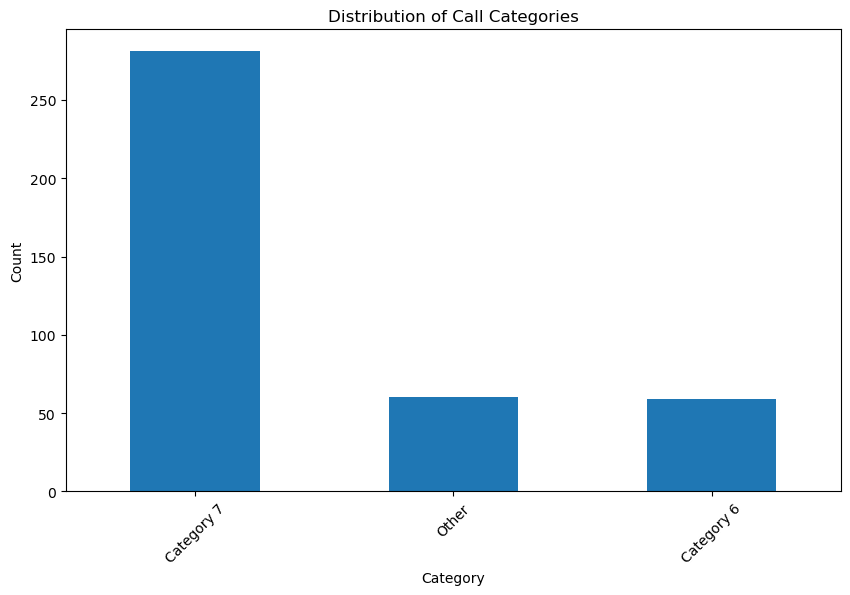

In [328]:
import matplotlib.pyplot as plt

# Count occurrences of each category in the target variable
target_counts = clean_with_targets["Call_Type_Name"].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
target_counts.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Call Categories")
plt.xticks(rotation=45)
plt.show()

In [329]:
clean_with_targets.shape

(400, 147)

In [330]:
# Looking for na values
navalues = clean_with_targets[clean_with_targets.isnull().any(axis=1)].head()
navalues

,Call_Type_Name,Low_Level_Segment6_item1,Low_Level_Segment6_item2,Low_Level_Segment6_item3,Low_Level_Segment6_item4,Low_Level_Segment6_item5,Low_Level_Segment6_item6,Business_Requirement1_item1,Business_Requirement1_item2,Business_Requirement1_item3,...,Legacy_Segment1_item28,Legacy_Segment2_item1,Legacy_Segment2_item2,Legacy_Segment2_item3,Legacy_Segment2_item4,Legacy_Segment2_item5,Legacy_Segment2_item6,Legacy_Segment2_item7,Legacy_Segment2_item8,Legacy_Segment2_item9


In [331]:
# Define features and target
X = clean_with_targets.drop(columns=["Call_Type_Name"])  # Features
y = clean_with_targets['Call_Type_Name']  # Target

In [332]:
# Splitting training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [333]:
# Initialise Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [334]:
# Make predictions
y_pred = rf.predict(X_test)

# Classification metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Category 6       1.00      0.92      0.96        12
  Category 7       0.89      1.00      0.94        56
       Other       1.00      0.50      0.67        12

    accuracy                           0.91        80
   macro avg       0.96      0.81      0.85        80
weighted avg       0.92      0.91      0.90        80



In [335]:
# Confusion matrix
confusion_matrix(y_test, y_pred)


array([[11,  1,  0],
       [ 0, 56,  0],
       [ 0,  6,  6]])

In [336]:
# Get recall per class
recall_per_class = recall_score(y_test, y_pred, average=None)

recall_category_6 = recall_per_class[0]  # Recall for Category 6
recall_category_7 = recall_per_class[1]  # Recall for Category 7

# Compute combined recall for Category 6 and 7
combined_recall = (recall_category_6 * y_test.value_counts()['Category 6'] + 
                   recall_category_7 * y_test.value_counts()['Category 7']) / (
                   y_test.value_counts()['Category 6'] + y_test.value_counts()['Category 7'])
print(combined_recall)

0.9852941176470589


In [337]:
# Making predictions of dataset without targets
predictions = rf.predict(clean_without_targets)

# Add predictions to the original dataset
rf_results = clean_without_targets.copy()
rf_results["Predicted_Category"] = predictions

# Save the predictions to a CSV file
rf_results.to_csv('Data Files-20250211/unlabelled_data_predictions.csv', index=False)


In [338]:
# Number of predictions for each category
rf_results['Predicted_Category'].value_counts()

Predicted_Category
Other         2121
Category 7     714
Category 6      56
Name: count, dtype: int64

## Semi-Supervised learning with Random Forest Classifier

In [339]:
# Make sure without target dataset has same structure
X_unlabelled = clean_without_targets[clean_with_targets.drop(columns=["Call_Type_Name"]).columns]

# Predict probabilities for the unlabelled data
unlabelled_probs = rf.predict_proba(X_unlabelled)

# Get the predicted labels and their highest confidence scores
unlabelled_preds = np.argmax(unlabelled_probs, axis=1)
max_probs = np.max(unlabelled_probs, axis=1)

# Create pseudo-labels for predictions with probability greater than 95%
X_pseudo = X_unlabelled[max_probs >= 0.95]
y_pseudo = unlabelled_preds[max_probs >= 0.95]

# Convert pseudo-labels to the same type as y_train
y_pseudo = rf.classes_[y_pseudo]

# Merge pseudo-labelled data with the original training dataset
X_combined = pd.concat([X_train, X_pseudo])
y_combined = pd.concat([y_train, pd.Series(y_pseudo, index=X_pseudo.index)])


In [340]:
# Initialise random forest classifier with pseudo dataset
rf_pseudo = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pseudo.fit(X_combined, y_combined)

# Make predictions
y_pseudo_pred = rf_pseudo.predict(X_test)

# Classification metrics
print(classification_report(y_test, y_pseudo_pred))

              precision    recall  f1-score   support

  Category 6       1.00      0.92      0.96        12
  Category 7       0.88      1.00      0.93        56
       Other       1.00      0.42      0.59        12

    accuracy                           0.90        80
   macro avg       0.96      0.78      0.83        80
weighted avg       0.91      0.90      0.89        80



In [341]:
# Confusion matrix
confusion_matrix(y_test, y_pseudo_pred)

array([[11,  1,  0],
       [ 0, 56,  0],
       [ 0,  7,  5]])

In [342]:
# Making predictions of dataset without targets
semi_predictions = rf_pseudo.predict(X_unlabelled)

# Add predictions to the original dataset
semi_results = clean_without_targets.copy()
semi_results["Predicted_Category"] = semi_predictions

# Save the predictions to a CSV file
semi_results.to_csv('Data Files-20250211/unlabelled_data_predictions.csv', index=False)

In [343]:
# Number of predictions for each category
semi_results['Predicted_Category'].value_counts()

Predicted_Category
Other         2159
Category 7     675
Category 6      57
Name: count, dtype: int64